In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Blokjespuzzel

De blokjespuzzel bevat de volgende blokjes:

![blokjes](blokjes.png)

In [124]:
def get_matrix_for_piece(P):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            if 5 * y + x in P:
                R[x][y] = 1
    return R

def rotate_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[y][4-x] = M[x][y]
    return R

def vflip_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[x][y] = M[4-x][y]
    return R

def hflip_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[x][y] = M[x][4-y]
    return R

Elk van de blokjes wordt opgeslagen in een $5\times 5$ array.

In [301]:
Z = [0, 1, 5, 6, 11, 12, 16, 17]
I = [0, 1, 2, 3, 5, 6, 7, 8]
L = [2, 3, 7, 8, 10, 11, 12, 13]
U = [0, 5, 10, 11, 12, 13, 8, 3]
Y = [0, 1, 2, 5, 6, 7, 11, 16]
B = [0, 1, 2, 5, 6, 7, 10, 11]
T = [1, 2, 6, 7, 10, 11, 12, 13]
P = [1, 6, 10, 11, 15, 16, 20, 21]
pieces = [Z, I, L, U, Y, B, T, P]
configurations = [4, 2, 4, 4, 4, 4, 4, 4]
names = ['Z', 'I', 'L', 'U', 'Y', 'B', 'T', 'P']
pieces = [get_matrix_for_piece(p) for p in pieces]

In [302]:
sum(configurations)

30

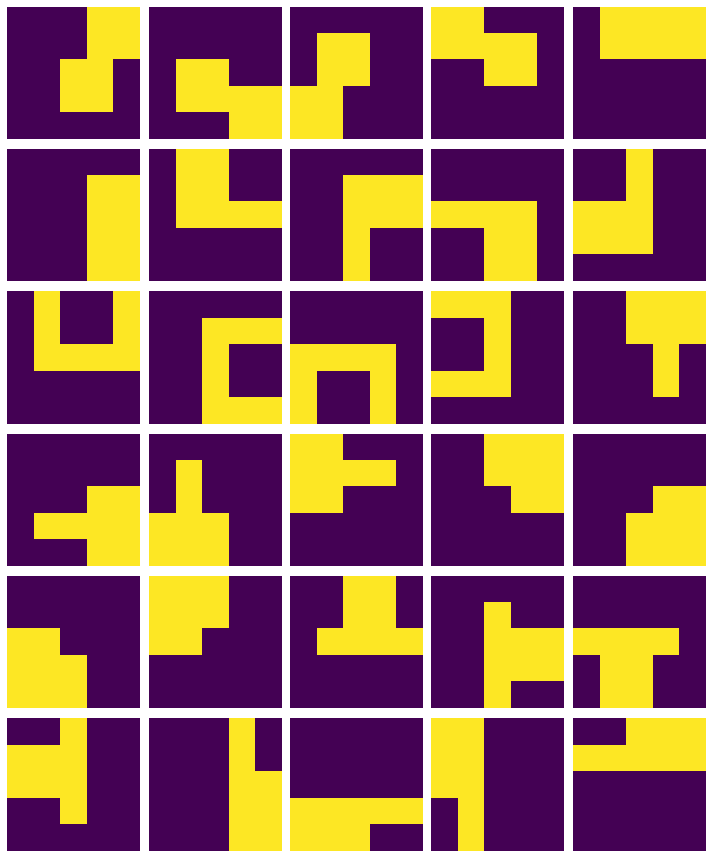

In [307]:
plt.subplots(6, 5, figsize=(10, 12))
curr_plot = 0
for i, p in enumerate(pieces):
    for j in range(configurations[i]):
        if configurations[i] in [2, 4]:
            p = rotate_matrix(p)
        elif configurations[i] == 8:
            if j & 1: 
                p = vflip_matrix(p)
            else:
                p = rotate_matrix(p)
        plt.subplot(6, 5, curr_plot + 1)
        plt.axis('off')
        plt.imshow(p)
        curr_plot += 1
        
#plt.subplot(6,6,35)
#plt.imshow(np.eye(5)*0)
#plt.axis('off')

#plt.subplot(6,6,36)
#plt.imshow(np.eye(5)*0)
#plt.axis('off')

plt.tight_layout(pad=1)

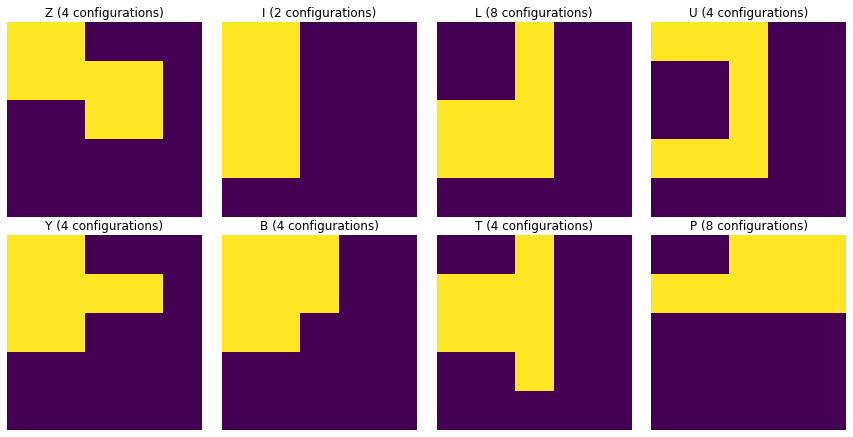

In [125]:
plt.subplots(2, 4, figsize=(12,6))
for i, p in enumerate(pieces):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(p)
    plt.title('{} ({} configurations)'.format(names[i], configurations[i]))
plt.tight_layout(pad=0.5)

In [126]:
def new_board():
    return [[0] * 8 for _ in range(8)]

In [127]:
def max2(X):
    return max([max(x) for x in X])

In [227]:
def place(P, B, B_pos):
    ax, ay = find_anchor(P)
    bx, by = B_pos
    n = max2(B)
    for x in range(-ax, 5-ax):
        for y in range(-ay, 5-ay):
            if P[x+ax][y+ay]:
                B[x+bx][y+by] = n+1
    return B

In [228]:
def remove(P, B, B_pos):
    ax, ay = find_anchor(P)
    bx, by = B_pos
    n = max2(B)
    for x in range(-ax, 5-ax):
        for y in range(-ay, 5-ay):
            if P[x+ax][y+ay]:
                B[x+bx][y+by] = 0
    return B

In [243]:
def can_place(P, B, B_pos):
    ax, ay = find_anchor(P)
    bx, by = B_pos
    n = max2(B)
    for x in range(-ax, 5-ax):
        for y in range(-ay, 5-ay):
            print('(x+bx, y+by) = ({}, {})'.format(x+bx, y+by))
            if P[x+ax][y+ay]                   \
                and (not 0 <= x + bx < 5       \
                     or not 0 <= y + by < 5    \
                     or not B[x+bx][y+by] == 0):
                return False
    return True

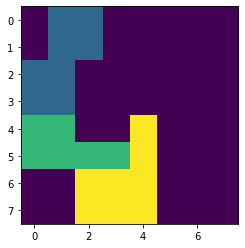

In [244]:
board = new_board()
z = place(ZR1, board, (0,1))
z = place(ZR2, board, (4,0))
z = place(pieces[2], board, (4, 4))
plt.imshow(board)

In [249]:
def print_state(board, current_pos, current_piece, current_configuration):
    print('Current pos: {}, Current piece: {}, Current configuration: {}'
         .format(current_pos, current_piece, current_configuration))
    plt.imshow(board)
    plt.show()
    print('-' * 26)

In [250]:
def next_pos(x, w, h):
    pos = x[1] * h + x[0]
    pos += 1
    xx = pos % h
    xy = pos // h
    return xx, xy

In [263]:
def solve(board, pieces, configurations, current_pos, current_piece, current_configuration):
    
    if current_pos == (8, 7): 
        return
    
    print_state(board, current_pos, current_piece, current_configuration)
    
    piece = pieces[current_piece]
    for ci in range(current_configuration, configurations[current_piece]):
        piece = rotate_matrix(piece)
        if can_place(board, piece, current_pos):
            board = place(piece, board, current_pos)
            solve(board, pieces, configurations, next_pos(current_pos, 8, 8), current_piece + 1, 0)
            return
        print('ci={}'.format(ci))
    
    solve(board, pieces, configurations, next_pos(current_pos, 8, 8), current_piece, current_configuration)
        
    

In [266]:
board = new_board()
#solve(board, pieces, configurations, (0, 0), 0, 0)

In [256]:
next_pos((5,8), 8, 8)

(6, 8)